### HEX TILE MAP FOR 2020 QUEENSLAND STATE ELECTION

In [185]:
# libraries
#import requests
#from bs4 import BeautifulSoup, Tag
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import pickle

In [186]:
### import the position codes for our hextiles graph
hex2020 = pd.read_csv('Q2020hextiles.csv')

([], <a list of 0 Text major ticklabel objects>)

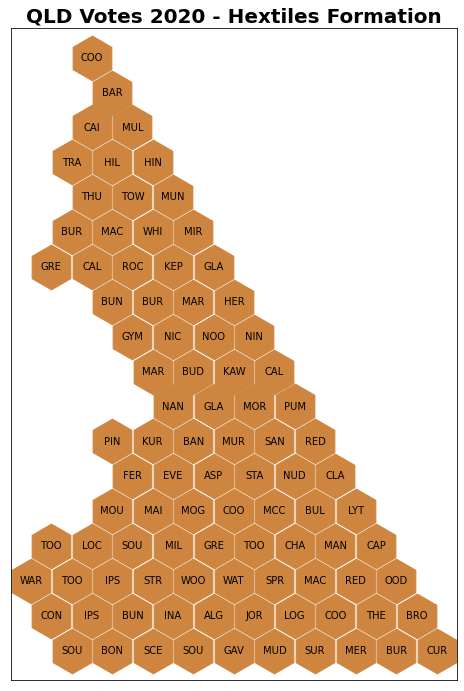

In [187]:
# an "empty" template version
fig, ax = plt.subplots()
plt.title('QLD Votes 2020 - Hextiles Formation', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.scatter(hex2020['x'], hex2020['y'], marker='h', s=2000, c='peru')
for i, point in hex2020.iterrows():
        text1 = str(point['Seat'][0:3].upper())
        plt.text(point['x'], point['y'], text1[0:4], ha="center", va="center")
plt.rcParams['figure.figsize'] = (8, 12)
plt.xticks([])
plt.yticks([])

In [188]:
# Now with the 2017 2PP results plugged in

# firstly, unpickle the df of 2017_2PP_seats
df2017 = pd.read_pickle("./2017_2PP_seats.pkl")            # pickles the df to access elsewhere

In [189]:
df2017 = df2017.merge(hex2020, how="left")  #  add hex details to each seats row   -- and next, color codes
df2017['color'] = np.where(df2017['winning party'] == 'ALP', 'tomato', np.where(df2017['winning party'] == 'GRN', 'springgreen', np.where(df2017['winning party'] == 'KAP', 'lightgrey', 'deepskyblue')))

([], <a list of 0 Text major ticklabel objects>)

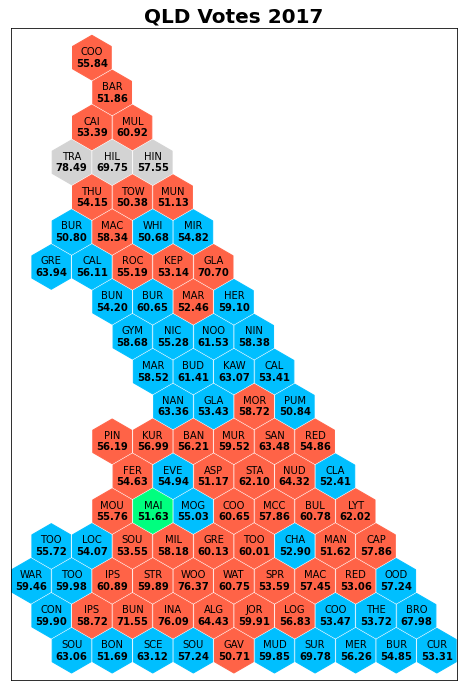

In [190]:
##  Now to show it with real results

fig, ax = plt.subplots()
plt.title('QLD Votes 2017', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.scatter(df2017['x'], df2017['y'], marker='h', s=2000, c=df2017['color'], )
for i, point in df2017.iterrows():                
        plt.text(point['x'], point['y']-0.05, point['winning pc'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y']+0.05, point['Seat'][0:3].upper(),ha="center", va="center")
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

In [191]:
### NOW FOR 2015

# firstly, unpickle the df of 2017_2PP_seats
df2015 = pd.read_pickle("./2015_2PP_seats.pkl")            # pickles the df to access elsewhere


In [192]:
# some seats now have different names , scrapped etc
# this cell deals with that
# this is the readon for the gaps in the 2015 map

hexrenamedf = hex2020

# note that some seats at end were abolished, but became the 2017 equiv. the last two were more or less replacements

names2017 = ['cooper','scenic rim','mcconnel','oodgeroo','maiwar', 'kurwongbah','traeger', 'toohey', 'miller', 'macalister','hill',]
names2015 = ['ashgrove','beaudesert','brisbane central','cleveland','indooroopilly', 'kallangur','mount isa', 'sunnybank', 'yeerongpilly','albert','dalrymple',]

for i in range(len(names2017)):
    hexrenamedf['Seat'] = hexrenamedf['Seat'].replace([names2017[i]],names2015[i])
    
# mount coot-tha is an out and out land grab on a space that didnt exist in 2017  

names2017 = ['aspley']
names2015 = ['mount coot-tha']

for i in range(len(names2017)):
    hexrenamedf['Seat'] = hexrenamedf['Seat'].replace([names2017[i]],names2015[i])

 # these are new seats from 2017
todroplist = ['bancroft', 'bonney', 'jordan', 'ninderry', 'theodore']
for i in todroplist:
    todrop = hexrenamedf.loc[hexrenamedf['Seat']==i].index
    hexrenamedf.drop(todrop, inplace=True)

hexrenamedf.shape    #88,3

(88, 3)

([], <a list of 0 Text major ticklabel objects>)

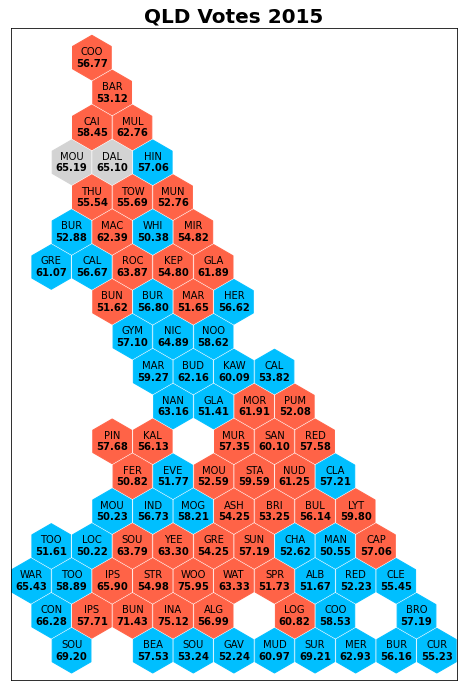

In [193]:
df2015 = df2015.merge(hexrenamedf, how="left")  #  add hex details to each seats row   -- and next, color codes
df2015 = df2015.dropna()
df2015['color'] = np.where(df2015['winning party'] == 'ALP', 'tomato', np.where(df2015['winning party'] == 'GRN', 'springgreen', np.where(df2015['winning party'] == 'KAP', 'lightgrey', 'deepskyblue')))

##  Now to show it with real results

fig, ax = plt.subplots()
plt.title('QLD Votes 2015', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.scatter(df2015['x'], df2015['y'], marker='h', s=2000, c=df['color'], )
for i, point in df.iterrows():                
        plt.text(point['x'], point['y']-0.05, point['winning pc'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y']+0.05, point['Seat'][0:3].upper(),ha="center", va="center")
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

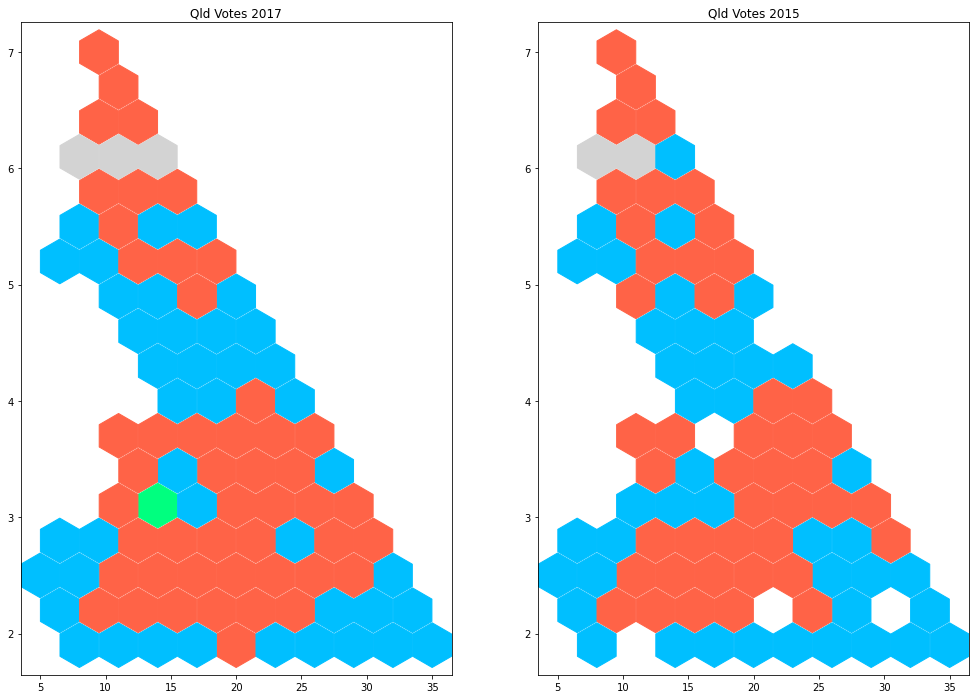

In [195]:
# 2017 and 2015 side by side

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,1]})

ax[0].scatter(df2017['x'], df2017['y'], marker='h', s=2000, c=df2017['color'], )
ax[0].set_title('Qld Votes 2017')

ax[1].scatter(df2015['x'], df2015['y'], marker='h', s=2000, c=df['color'])
ax[1].set_title('Qld Votes 2015')

plt.rcParams['figure.figsize'] = (17, 12) 